#  Task 6 Assignment
>AUTHOR : Utshab Pyakurel\
>Exploratory Data Analysis - Terrorism\
>As a security/defense analyst, try to fing the hot zones of Terrorism.\
>What all security issues and insights you can derive by EDA?.


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#filter out warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
terror=pd.read_csv("./globalterrorismdb_0718dist.csv",encoding='latin1')

In [4]:
# To read Data where we will get top 5 rows.
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terror.columns.values  

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
terror_new=terror[['iyear', 'imonth', 'iday','country_txt','region_txt','provstate', 'city','attacktype1_txt',
             'targtype1_txt','targsubtype1_txt','gname','weaptype1_txt','weapsubtype1_txt','nperps',
             'nkill','nwound','target1','motive']]

terrorr_new=(terror_new.rename(columns = {'iyear': 'year', 'imonth': 'month','iday':'day','country_txt':'country',
                                        'region_txt':'region','provstate':'state','attacktype1_txt':'attacktype',
                                        'targtype1_txt':'target','attacktype1_txt':'attacktype',
                                        'targsubtype1_txt':'targsubtype','gname':'group',
                                        'weaptype1_txt':'weapon','nperps':'perp','weapsubtype1_txt':'weaponsub',
                                        'nkill':'killed','nwound':'wounded'},inplace=True))

In [7]:
terror_new['Casualties']=terror_new['killed']+terror_new['wounded']

In [8]:
terror_new.shape

(181691, 19)

In [9]:
terror_new.dtypes

year             int64
month            int64
day              int64
country         object
region          object
state           object
city            object
attacktype      object
target          object
targsubtype     object
group           object
weapon          object
weaponsub       object
perp           float64
killed         float64
wounded        float64
target1         object
motive          object
Casualties     float64
dtype: object

In [10]:
terror_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country      181691 non-null  object 
 4   region       181691 non-null  object 
 5   state        181270 non-null  object 
 6   city         181257 non-null  object 
 7   attacktype   181691 non-null  object 
 8   target       181691 non-null  object 
 9   targsubtype  171318 non-null  object 
 10  group        181691 non-null  object 
 11  weapon       181691 non-null  object 
 12  weaponsub    160923 non-null  object 
 13  perp         110576 non-null  float64
 14  killed       171378 non-null  float64
 15  wounded      165380 non-null  float64
 16  target1      181055 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualties   164817 non-

In [11]:
terror_new.isnull().sum()

year                0
month               0
day                 0
country             0
region              0
state             421
city              434
attacktype          0
target              0
targsubtype     10373
group               0
weapon              0
weaponsub       20768
perp            71115
killed          10313
wounded         16311
target1           636
motive         131130
Casualties      16874
dtype: int64

In [12]:
terror_new.describe()

,year,month,day,perp,killed,wounded,Casualties
count,181691.000000,181691.000000,181691.000000,110576.000000,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,-65.361154,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,216.536633,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,-99.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,-99.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,25000.000000,1570.000000,8191.000000,9574.000000


In [13]:
print(terror_new['state'].mode())
print(terror_new['city'].mode())
print(terror_new['targsubtype'].mode())
print(terror_new['target1'].mode())
print(terror_new['motive'].mode())
print(terror_new['weaponsub'].mode())

0    Baghdad
Name: state, dtype: object
0    Unknown
Name: city, dtype: object
0    Unnamed Civilian/Unspecified
Name: targsubtype, dtype: object
0    Civilians
Name: target1, dtype: object
0    Unknown
Name: motive, dtype: object
0    Unknown Explosive Type
Name: weaponsub, dtype: object


In [14]:
terror_new['state']=terror_new['state'].fillna("Baghdad")
terror_new['city']=terror_new['city'].fillna("Unknown")
terror_new['targsubtype']=terror_new['targsubtype'].fillna("Unnamed Civilian/Unspecified")
terror_new['target1']=terror_new['target1'].fillna("Civilians")
terror_new['motive']=terror_new['motive'].fillna("Unknown")
terror_new['perp']=terror_new['perp'].fillna(terror_new['perp'].median())
terror_new['killed']=terror_new['killed'].fillna(terror_new['killed'].median())
terror_new['wounded']=terror_new['wounded'].fillna(terror_new['wounded'].median())
terror_new['Casualties']=terror_new['Casualties'].fillna(terror_new['Casualties'].median())
terror_new['weaponsub']=terror_new['weaponsub'].fillna("Unknown Explosive Type")

In [15]:
terror_new.isnull().sum()

year           0
month          0
day            0
country        0
region         0
state          0
city           0
attacktype     0
target         0
targsubtype    0
group          0
weapon         0
weaponsub      0
perp           0
killed         0
wounded        0
target1        0
motive         0
Casualties     0
dtype: int64

In [16]:
print("Total Number of People Killed : ",terror_new['killed'].sum())
print("Total Casualties : ",terror_new['Casualties'].sum())

Total Number of People Killed :  411868.0
Total Casualties :  889766.0


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

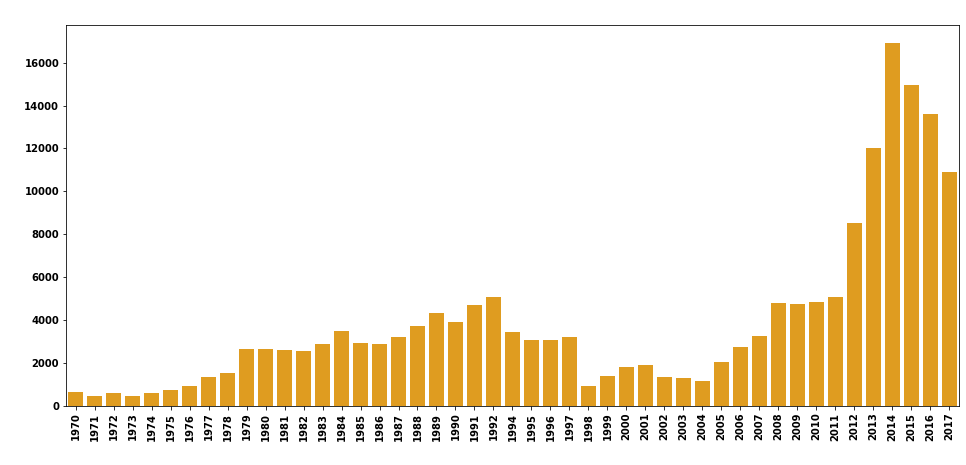

In [17]:
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['year'],color='orange')
plt.xlabel("YEAR",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel("TOTAL NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.title("YEAR WISE STATISTICS OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

In [18]:
year_2013=terror_new[terror_new['year']==2013]
year_2014=terror_new[terror_new['year']==2014]
print("Percentage Increase in terror attacks in 2014 over 2013 is ",round(((len(year_2014)-len(year_2013))/len(year_2013)*100),0),"%")

Percentage Increase in terror attacks in 2014 over 2013 is  40.0 %


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

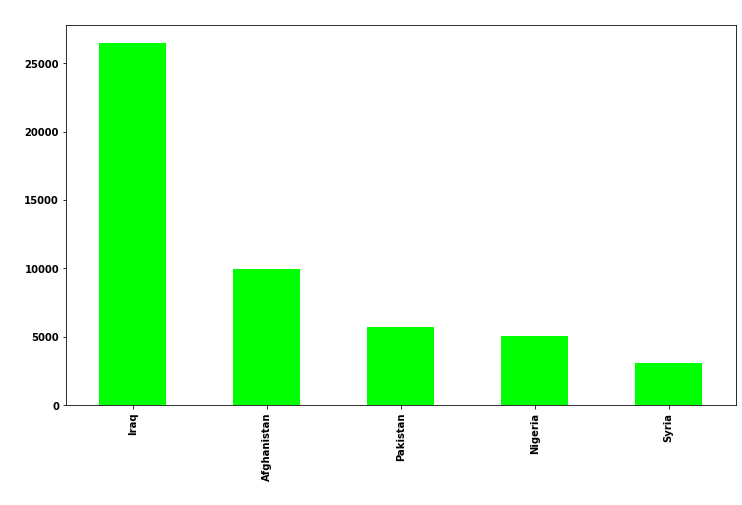

In [19]:
year_2014.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).head().plot.bar(color="#00FF00",figsize=(12,7))
plt.xlabel("COUNTRY",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel("TOTAL CASUALTIES",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.title("TOP 5 COUNTRIES BASED ON TOTAL CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

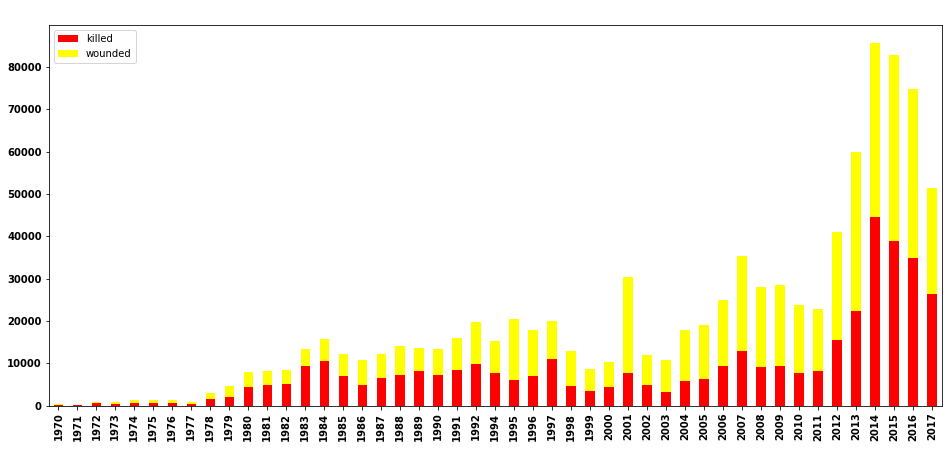

In [20]:
terror_new.groupby(['year'])['killed','wounded'].sum().plot.bar(stacked=True,color=['red','yellow'],figsize=(16,7))
plt.xlabel("YEAR",fontdict={'color':"white","fontsize":13})
plt.title("YEAR WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

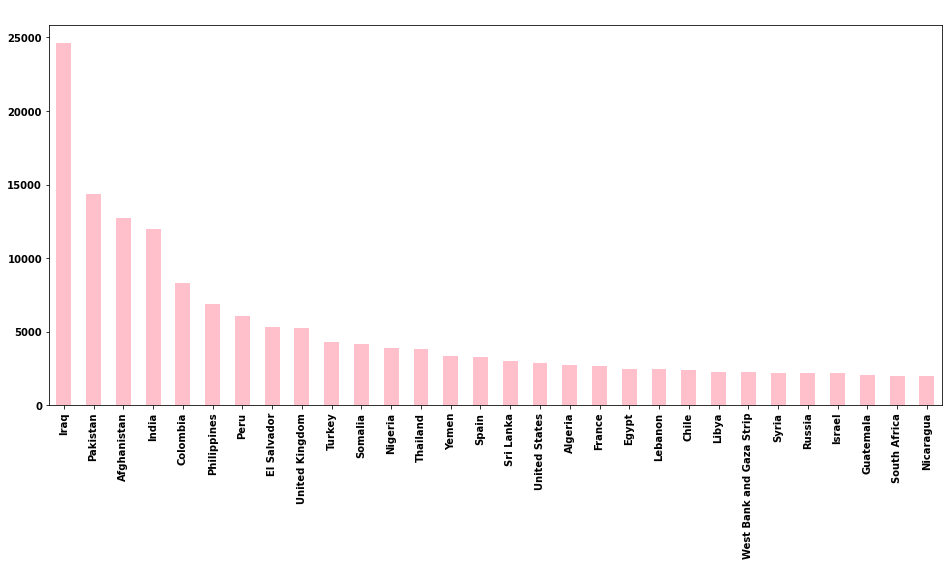

In [21]:
terror_new['country'].value_counts().head(30).plot.bar(figsize=(16,7),color='pink')
plt.title("COUNTRY WISE TERRORIST ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

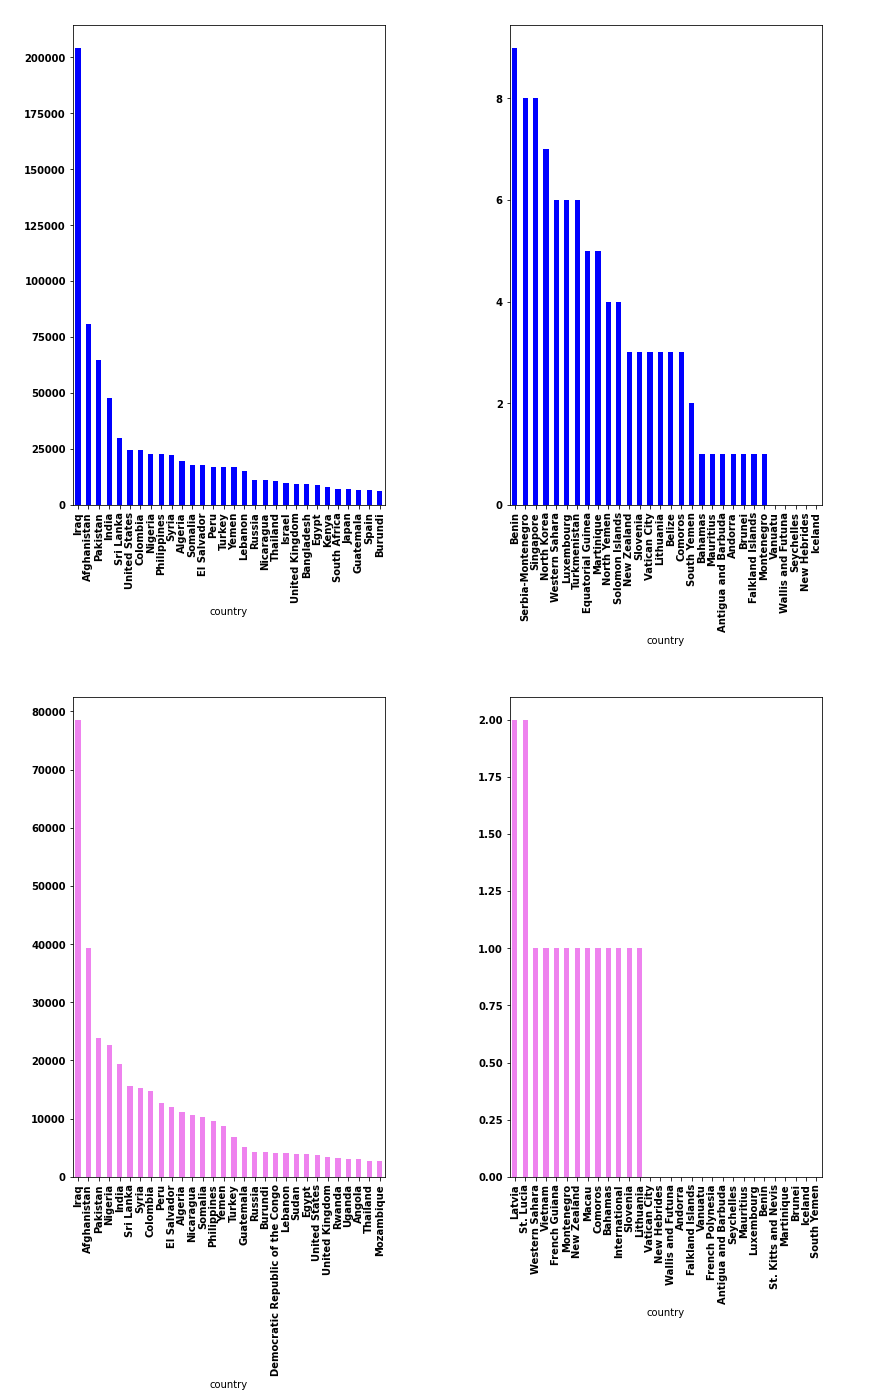

In [22]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=0.9,  top=0.9,  wspace=0.4,  hspace=0.4)
plt.subplot(2,2,1)
terror_new.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH MOST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,2)
terror_new.groupby(['country'])['Casualties'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='blue')
plt.ylabel("CASUALTIES",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,3)
terror_new.groupby(['country'])['killed'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(13,20),color='violet')
plt.ylabel("KILLED",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH HIGHEST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2,2,4)
terror_new.groupby(['country'])['killed'].sum().sort_values(ascending=False).tail(30).plot.bar(figsize=(13,20),color='violet')
plt.ylabel("KILLED",fontdict={'color':"white","fontsize":12})
plt.title("COUNTRIES WITH LEAST FATALITIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

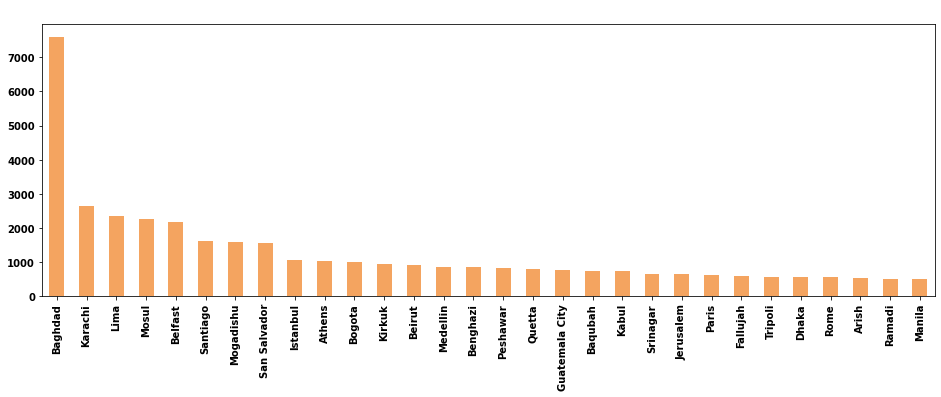

In [23]:
city_df=terror_new[terror_new['city']!="Unknown"]
city_df['city'].value_counts().head(30).plot.bar(color="#F4A460",figsize=(16,5))
plt.title("CITIES WITH MOST TERROR ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

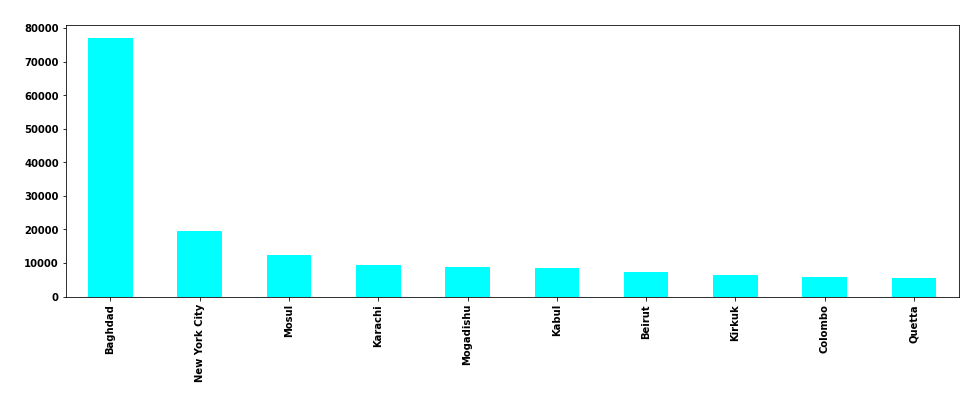

In [24]:
city_df.groupby(['city'])['Casualties'].sum().sort_values(ascending=False).head(10).plot.bar(color="#00FFFF",figsize=(16,5))
plt.title("CITIES WITH MOST NUMBER OF CASUALTIES",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.ylabel('CASUALTIES',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xlabel('CITY',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

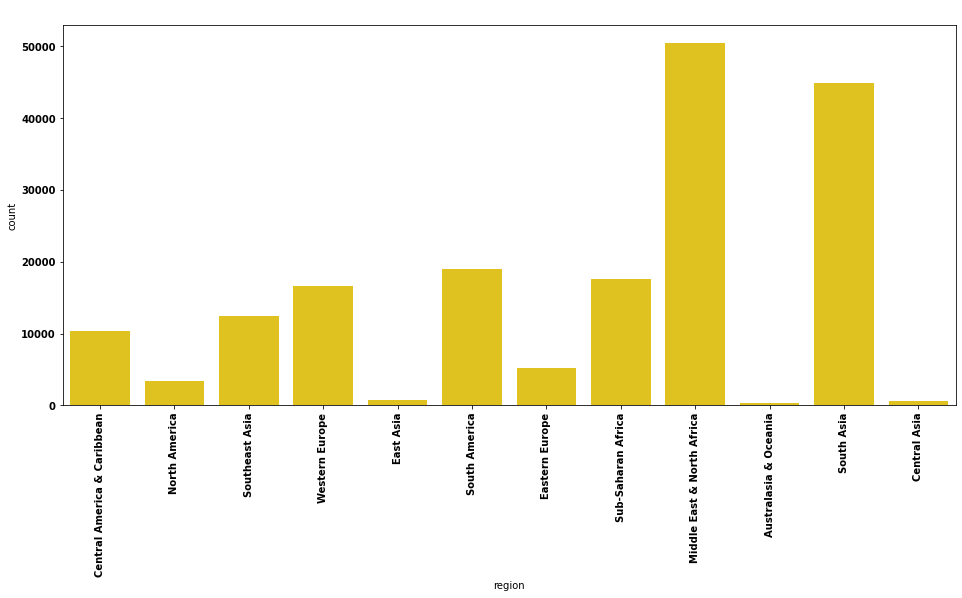

In [25]:
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['region'],color='#FFD700')
plt.title("TERRORIST ATTACKS IN DIFFERENT REGIONS OF THE WORLD",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

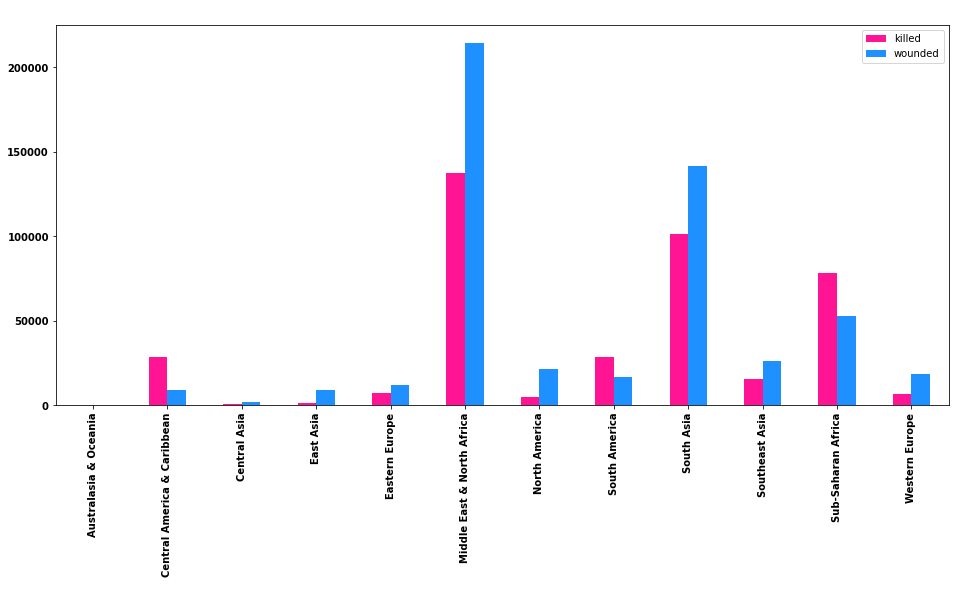

In [26]:

terror_new.groupby(['region'])['killed','wounded'].sum().plot.bar(color=['#FF1493','#1E90FF'],figsize=(16,7))
plt.title("REGION WISE KILLED AND WOUNDED",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel("REGION",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

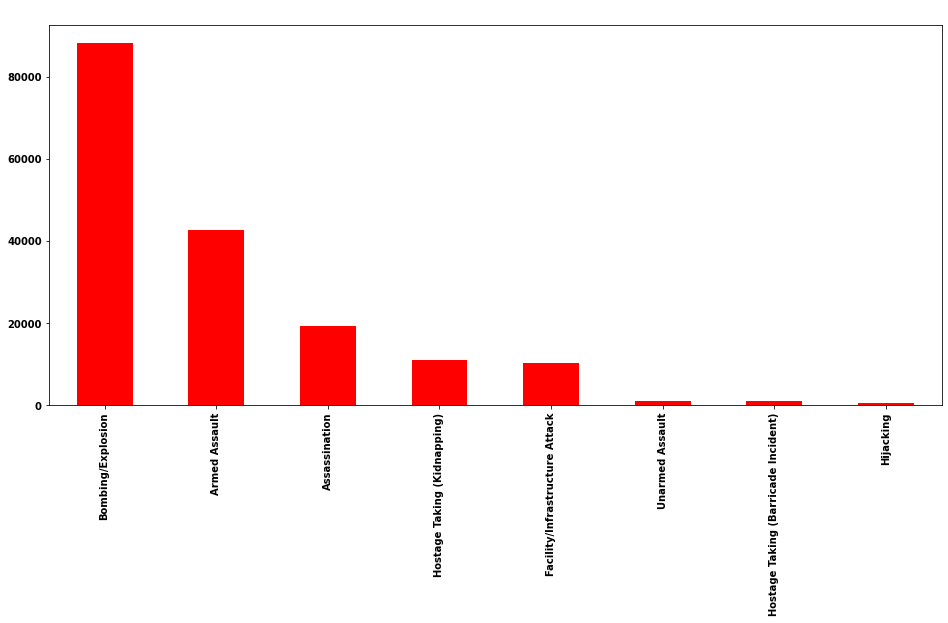

In [27]:
attack_df=terror_new[terror_new['attacktype']!="Unknown"]
attack_df['attacktype'].value_counts().plot.bar(figsize=(16,7),color='#FF0000')
plt.title("MOST COMMON ATTACK TYPE",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

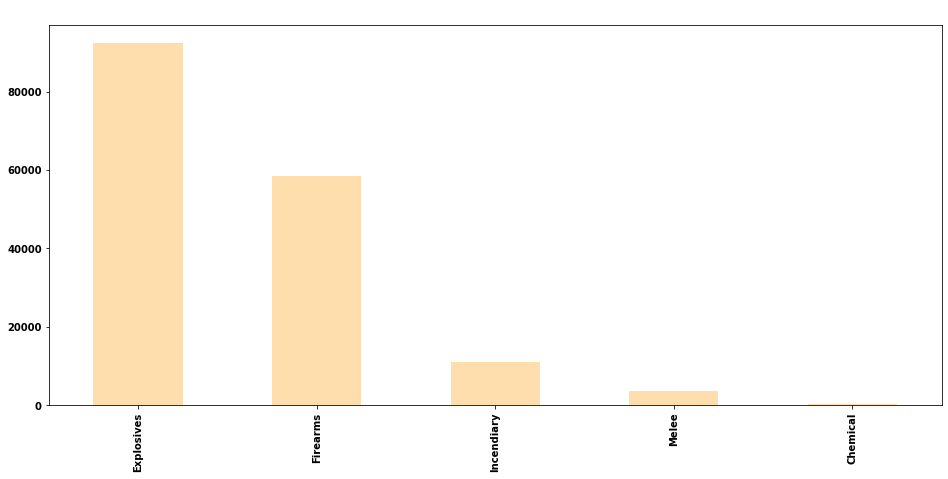

In [28]:
weapon_df=terror_new[terror_new['weapon']!="Unknown"]
weapon_df['weapon'].value_counts().head(5).plot.bar(figsize=(16,7),color='#FFDEAD')
plt.title("MOST USED WEAPONS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold',rotation=90)
plt.yticks(fontweight='bold')

In [29]:
country_list=terror_new.loc[terror_new['country'].isin(terror_new['country'].value_counts().nlargest(10).index.to_list())]
pd.crosstab(country_list['country'],country_list['attacktype'])

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
country,,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
Colombia,1972,1343,3128,275,33,89,1058,14,394
El Salvador,2216,449,2055,194,0,117,154,1,134
India,3184,1229,4825,996,43,44,1184,143,312
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Peru,1328,1002,3115,223,8,74,97,4,245
Philippines,2158,1099,2213,452,34,53,602,4,293
Turkey,1289,437,1957,279,13,13,158,10,136


In [30]:
pd.crosstab(terror_new['region'],weapon_df['weapon'])

weapon,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
region,,,,,,,,,,,
Australasia & Oceania,0,11,80,0,74,74,10,1,0,0,1
Central America & Caribbean,0,2,3149,0,5679,435,65,0,0,5,4
Central Asia,0,2,254,1,232,15,14,0,0,0,0
East Asia,2,17,333,4,41,252,82,3,10,3,8
Eastern Europe,0,12,3089,4,1461,186,90,4,0,4,1
Middle East & North Africa,1,73,32283,6,11877,1181,1227,23,0,10,69
North America,24,26,1557,5,682,897,74,18,1,19,15
South America,1,26,9098,3,6525,1077,131,6,0,15,3
South Asia,2,83,22568,3,15169,2285,998,16,1,46,15


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

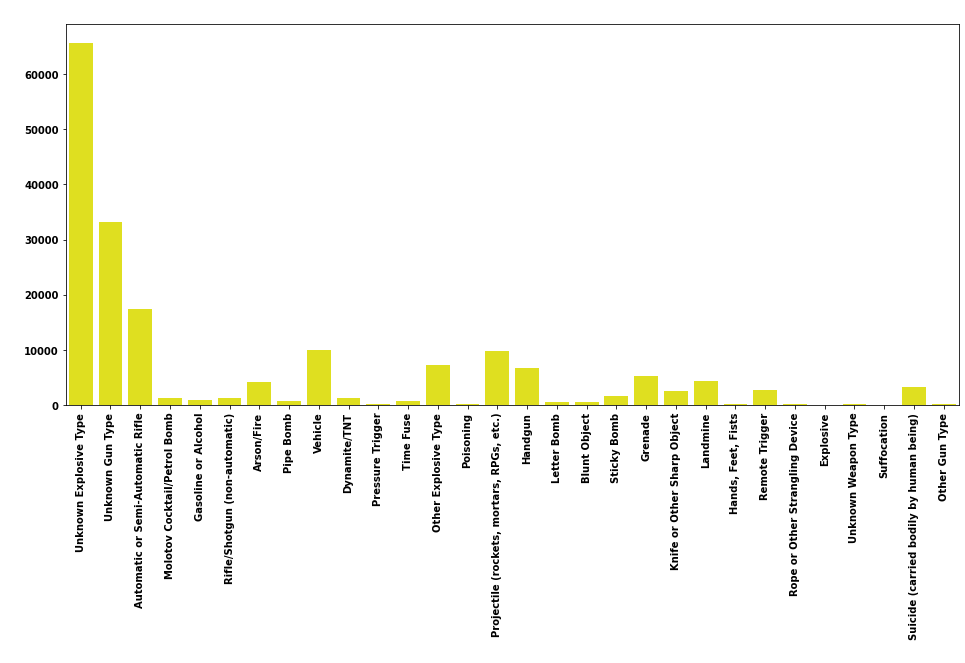

In [31]:
plt.subplots(figsize=(16,7))
sns.countplot(terror_new['weaponsub'],color='#ffff00')
plt.title("Subtype of Weapons Used Along With The Primary Weapon",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xlabel('WEAPONSUB',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.ylabel('COUNT',fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.xticks(rotation=90,fontweight='bold')
plt.yticks(fontweight='bold')

Text(0.5, 1.0, 'GROUPS WITH HIGHEST NUMBER OF ATTACKS')

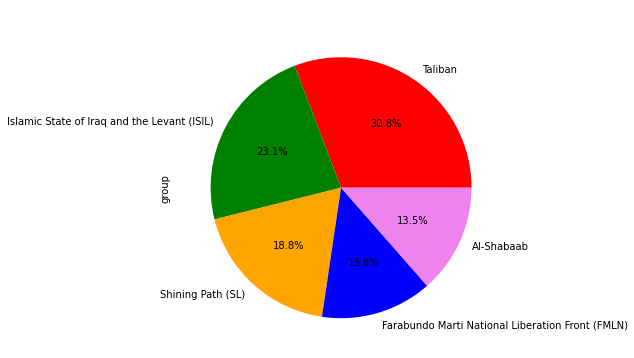

In [32]:
group_df=terror_new[terror_new['group']!='Unknown']
group_df['group'].value_counts().head().plot.pie(figsize=(12,6),autopct="%.1f%%",colors=["red",'green','orange','blue','violet'])
plt.title("GROUPS WITH HIGHEST NUMBER OF ATTACKS",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

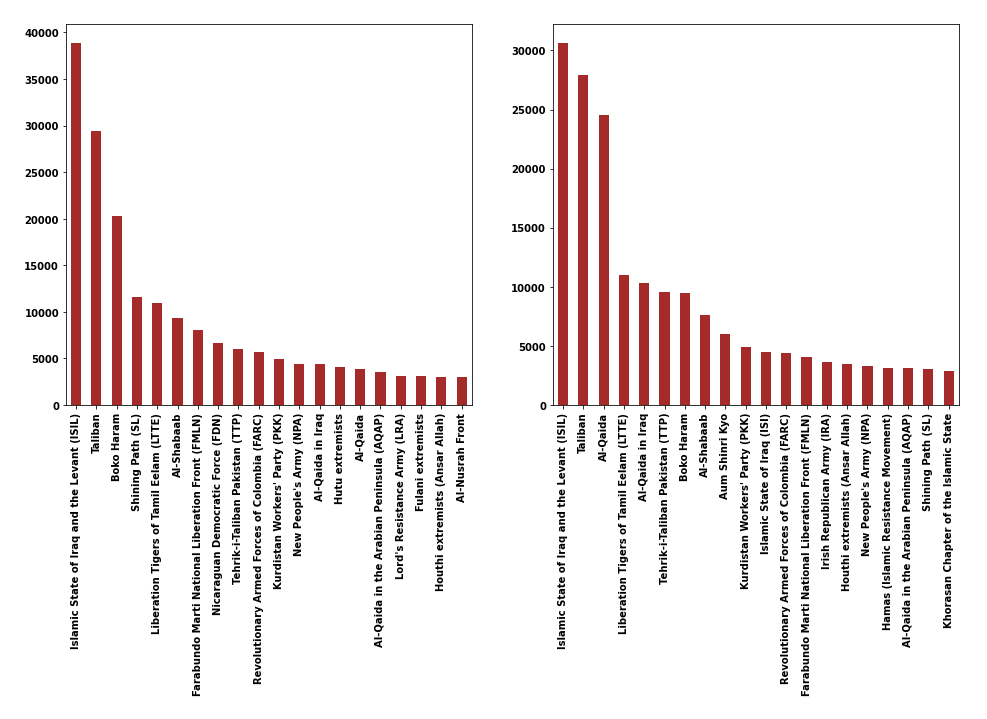

In [33]:

plt.subplot(1,2,1)
group_df.groupby(['group'])['killed'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Killed",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the deaths",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(1,2,2)
group_df.groupby(['group'])['wounded'].sum().sort_values(ascending=False).head(20).plot.bar(figsize=(16,7),color='brown')
plt.ylabel("No: Of People They Have Injured",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.xlabel("Terrorist groups",fontdict={'color':"white","fontsize":12,'fontweight':'bold'})
plt.title("Terrorists groups responsible for most of the injuries",fontdict={'color':"white","fontsize":15,'fontweight':"bold"})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')